In [2]:
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam_v2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from google.colab import drive


In [3]:
# Load the dataset
def load_data():
  (x_train, y_train), (_, _) = mnist.load_data()
  x_train = (x_train.astype(np.float32) - 127.5)/127.5
  
  # Convert shape from (60000, 28, 28) to (60000, 784)
  x_train = x_train.reshape(60000, 784)
  return (x_train, y_train)

X_train, y_train = load_data()
print(X_train.shape, y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784) (60000,)


In [11]:
def build_generator():
    model = Sequential()
    
    model.add(Dense(units=256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Dense(units=512))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Dense(units=1024))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Dense(units=784, activation='tanh'))
    
    model.compile(loss='binary_crossentropy', optimizer=adam_v2.Adam(0.0002, 0.5))
    return model

generator = build_generator()
generator.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               25856     
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 512)               131584    
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 1024)              525312    
                                                                 
 leaky_re_lu_23 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dense_31 (Dense)            (None, 784)              

In [12]:
def build_discriminator():
    model = Sequential()
    
    model.add(Dense(units=1024 ,input_dim=784))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
       
    model.add(Dense(units=512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
       
    model.add(Dense(units=256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
      
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=adam_v2.Adam(0.0002, 0.5))
    return model
  
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 1024)              803840    
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_33 (Dense)            (None, 512)               524800    
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_34 (Dense)            (None, 256)              

In [13]:
def build_GAN(discriminator, generator):
    discriminator.trainable=False
    GAN_input = Input(shape=(100,))
    x = generator(GAN_input)
    GAN_output= discriminator(x)
    GAN = Model(inputs=GAN_input, outputs=GAN_output)
    GAN.compile(loss='binary_crossentropy', optimizer=adam_v2.Adam(0.0002, 0.5))
    return GAN

GAN = build_GAN(discriminator, generator)
GAN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_7 (Sequential)   (None, 784)               1486352   
                                                                 
 sequential_8 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [14]:
def draw_images(generator, epoch, examples=25, dim=(5,5), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(25,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='Greys')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('Generated_images %d.png' %epoch)

Epoch 1


100%|██████████| 128/128 [00:22<00:00,  5.64it/s]


Epoch 2


100%|██████████| 128/128 [00:21<00:00,  5.84it/s]


Epoch 3


100%|██████████| 128/128 [00:22<00:00,  5.72it/s]


Epoch 4


100%|██████████| 128/128 [00:22<00:00,  5.78it/s]


Epoch 5


100%|██████████| 128/128 [00:21<00:00,  5.85it/s]


Epoch 6


100%|██████████| 128/128 [00:22<00:00,  5.81it/s]


Epoch 7


100%|██████████| 128/128 [00:22<00:00,  5.61it/s]


Epoch 8


100%|██████████| 128/128 [00:22<00:00,  5.72it/s]


Epoch 9


100%|██████████| 128/128 [00:21<00:00,  5.84it/s]


Epoch 10


100%|██████████| 128/128 [00:21<00:00,  5.83it/s]


Epoch 11


100%|██████████| 128/128 [00:22<00:00,  5.58it/s]


Epoch 12


100%|██████████| 128/128 [00:22<00:00,  5.57it/s]


Epoch 13


100%|██████████| 128/128 [00:23<00:00,  5.50it/s]


Epoch 14


100%|██████████| 128/128 [00:23<00:00,  5.53it/s]


Epoch 15


100%|██████████| 128/128 [00:22<00:00,  5.65it/s]


Epoch 16


100%|██████████| 128/128 [00:22<00:00,  5.70it/s]


Epoch 17


100%|██████████| 128/128 [00:22<00:00,  5.74it/s]


Epoch 18


100%|██████████| 128/128 [00:21<00:00,  5.91it/s]


Epoch 19


100%|██████████| 128/128 [00:21<00:00,  5.86it/s]


Epoch 20


100%|██████████| 128/128 [00:21<00:00,  5.88it/s]


Epoch 21


100%|██████████| 128/128 [00:22<00:00,  5.79it/s]


Epoch 22


100%|██████████| 128/128 [00:21<00:00,  5.96it/s]


Epoch 23


100%|██████████| 128/128 [00:21<00:00,  5.98it/s]


Epoch 24


100%|██████████| 128/128 [00:21<00:00,  5.97it/s]


Epoch 25


100%|██████████| 128/128 [00:21<00:00,  5.86it/s]


Epoch 26


100%|██████████| 128/128 [00:22<00:00,  5.80it/s]


Epoch 27


100%|██████████| 128/128 [00:21<00:00,  5.94it/s]


Epoch 28


100%|██████████| 128/128 [00:21<00:00,  5.95it/s]


Epoch 29


100%|██████████| 128/128 [00:21<00:00,  5.95it/s]


Epoch 30


100%|██████████| 128/128 [00:21<00:00,  5.96it/s]


Epoch 31


100%|██████████| 128/128 [00:21<00:00,  5.84it/s]


Epoch 32


100%|██████████| 128/128 [00:21<00:00,  5.88it/s]


Epoch 33


100%|██████████| 128/128 [00:21<00:00,  5.92it/s]


Epoch 34


100%|██████████| 128/128 [00:21<00:00,  6.01it/s]


Epoch 35


100%|██████████| 128/128 [00:21<00:00,  5.87it/s]


Epoch 36


100%|██████████| 128/128 [00:21<00:00,  5.83it/s]


Epoch 37


100%|██████████| 128/128 [00:21<00:00,  5.89it/s]


Epoch 38


100%|██████████| 128/128 [00:21<00:00,  6.00it/s]


Epoch 39


100%|██████████| 128/128 [00:21<00:00,  5.96it/s]


Epoch 40


100%|██████████| 128/128 [00:21<00:00,  5.92it/s]


Epoch 41


100%|██████████| 128/128 [00:21<00:00,  5.98it/s]


Epoch 42


100%|██████████| 128/128 [00:20<00:00,  6.10it/s]


Epoch 43


100%|██████████| 128/128 [00:21<00:00,  6.00it/s]


Epoch 44


100%|██████████| 128/128 [00:21<00:00,  5.94it/s]


Epoch 45


100%|██████████| 128/128 [00:21<00:00,  6.01it/s]


Epoch 46


100%|██████████| 128/128 [00:22<00:00,  5.75it/s]


Epoch 47


100%|██████████| 128/128 [00:24<00:00,  5.26it/s]


Epoch 48


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 49


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 50


100%|██████████| 128/128 [00:23<00:00,  5.55it/s]


Epoch 51


100%|██████████| 128/128 [00:22<00:00,  5.65it/s]


Epoch 52


100%|██████████| 128/128 [00:23<00:00,  5.51it/s]


Epoch 53


100%|██████████| 128/128 [00:23<00:00,  5.41it/s]


Epoch 54


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 55


100%|██████████| 128/128 [00:23<00:00,  5.42it/s]


Epoch 56


100%|██████████| 128/128 [00:22<00:00,  5.60it/s]


Epoch 57


100%|██████████| 128/128 [00:22<00:00,  5.60it/s]


Epoch 58


100%|██████████| 128/128 [00:22<00:00,  5.66it/s]


Epoch 59


100%|██████████| 128/128 [00:22<00:00,  5.60it/s]


Epoch 60


100%|██████████| 128/128 [00:22<00:00,  5.65it/s]


Epoch 61


100%|██████████| 128/128 [00:22<00:00,  5.59it/s]


Epoch 62


100%|██████████| 128/128 [00:22<00:00,  5.66it/s]


Epoch 63


100%|██████████| 128/128 [00:22<00:00,  5.72it/s]


Epoch 64


100%|██████████| 128/128 [00:22<00:00,  5.68it/s]


Epoch 65


100%|██████████| 128/128 [00:22<00:00,  5.73it/s]


Epoch 66


100%|██████████| 128/128 [00:22<00:00,  5.75it/s]


Epoch 67


100%|██████████| 128/128 [00:22<00:00,  5.77it/s]


Epoch 68


100%|██████████| 128/128 [00:22<00:00,  5.75it/s]


Epoch 69


100%|██████████| 128/128 [00:22<00:00,  5.67it/s]


Epoch 70


100%|██████████| 128/128 [00:22<00:00,  5.70it/s]


Epoch 71


100%|██████████| 128/128 [00:22<00:00,  5.57it/s]


Epoch 72


100%|██████████| 128/128 [00:22<00:00,  5.70it/s]


Epoch 73


100%|██████████| 128/128 [00:22<00:00,  5.73it/s]


Epoch 74


100%|██████████| 128/128 [00:22<00:00,  5.71it/s]


Epoch 75


100%|██████████| 128/128 [00:22<00:00,  5.73it/s]


Epoch 76


100%|██████████| 128/128 [00:22<00:00,  5.79it/s]


Epoch 77


100%|██████████| 128/128 [00:22<00:00,  5.73it/s]


Epoch 78


100%|██████████| 128/128 [00:22<00:00,  5.80it/s]


Epoch 79


100%|██████████| 128/128 [00:21<00:00,  5.82it/s]


Epoch 80


100%|██████████| 128/128 [00:22<00:00,  5.74it/s]


Epoch 81


100%|██████████| 128/128 [00:22<00:00,  5.69it/s]


Epoch 82


100%|██████████| 128/128 [00:22<00:00,  5.82it/s]


Epoch 83


100%|██████████| 128/128 [00:22<00:00,  5.77it/s]


Epoch 84


100%|██████████| 128/128 [00:22<00:00,  5.79it/s]


Epoch 85


100%|██████████| 128/128 [00:22<00:00,  5.79it/s]


Epoch 86


100%|██████████| 128/128 [00:23<00:00,  5.43it/s]


Epoch 87


100%|██████████| 128/128 [00:23<00:00,  5.39it/s]


Epoch 88


100%|██████████| 128/128 [00:24<00:00,  5.19it/s]


Epoch 89


100%|██████████| 128/128 [00:24<00:00,  5.28it/s]


Epoch 90


100%|██████████| 128/128 [00:25<00:00,  5.07it/s]


Epoch 91


100%|██████████| 128/128 [00:28<00:00,  4.57it/s]


Epoch 92


100%|██████████| 128/128 [00:27<00:00,  4.61it/s]


Epoch 93


100%|██████████| 128/128 [00:28<00:00,  4.52it/s]


Epoch 94


100%|██████████| 128/128 [00:30<00:00,  4.13it/s]


Epoch 95


100%|██████████| 128/128 [00:33<00:00,  3.86it/s]


Epoch 96


100%|██████████| 128/128 [00:30<00:00,  4.24it/s]


Epoch 97


100%|██████████| 128/128 [00:29<00:00,  4.38it/s]


Epoch 98


100%|██████████| 128/128 [00:27<00:00,  4.62it/s]


Epoch 99


100%|██████████| 128/128 [00:28<00:00,  4.43it/s]


Epoch 100


100%|██████████| 128/128 [00:25<00:00,  4.95it/s]


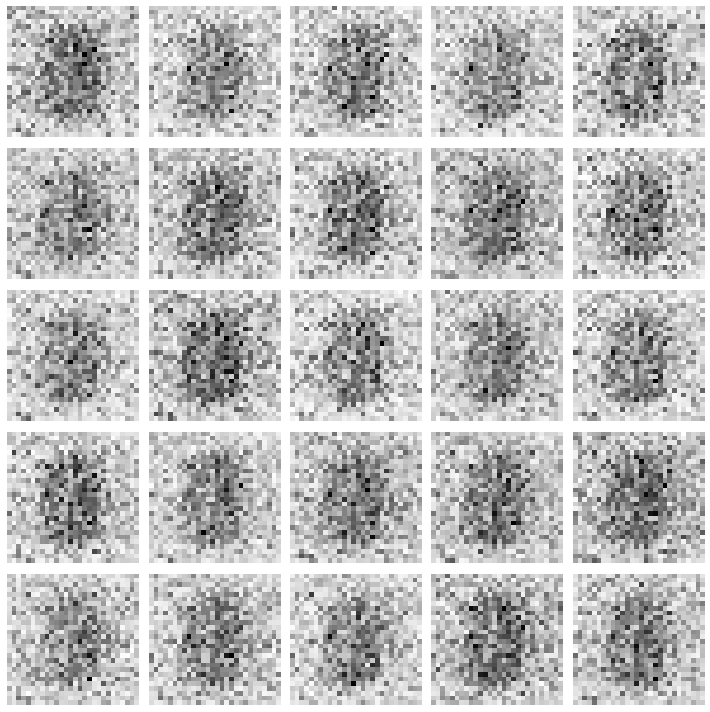

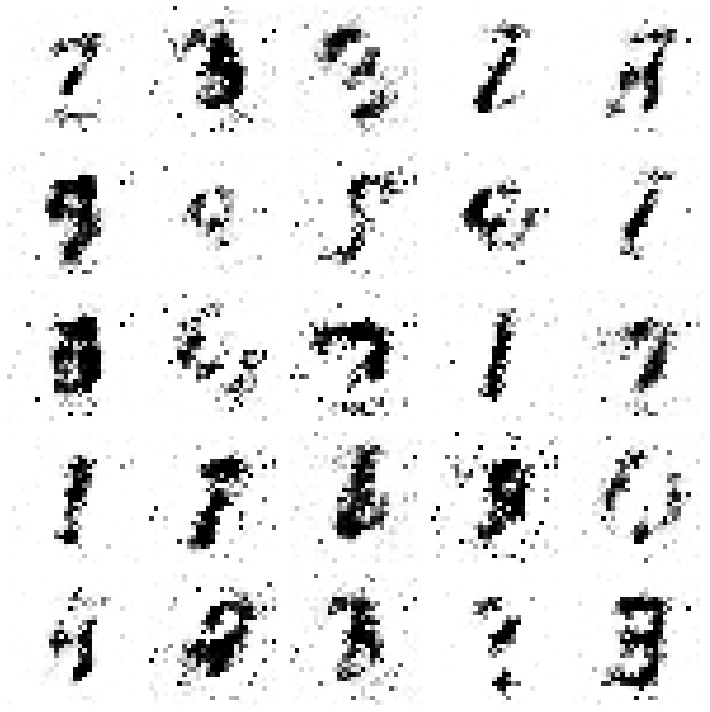

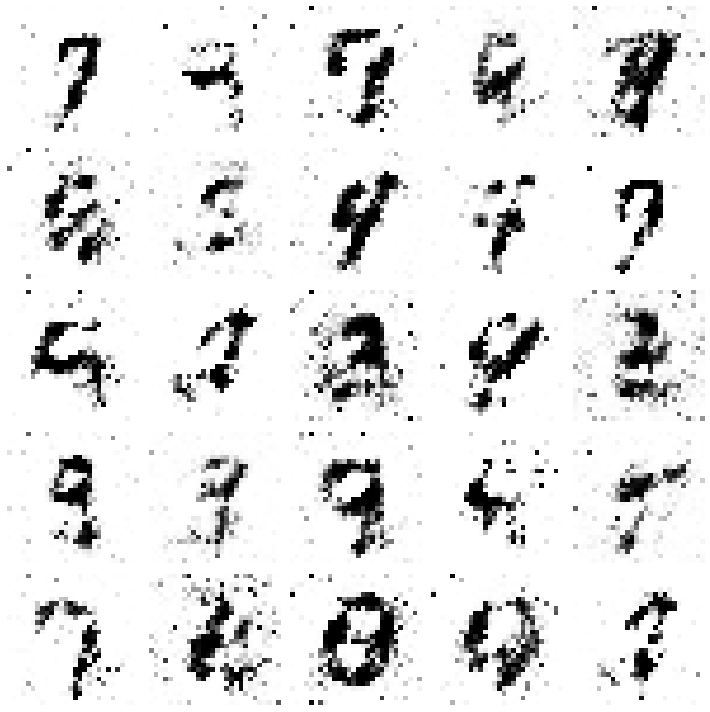

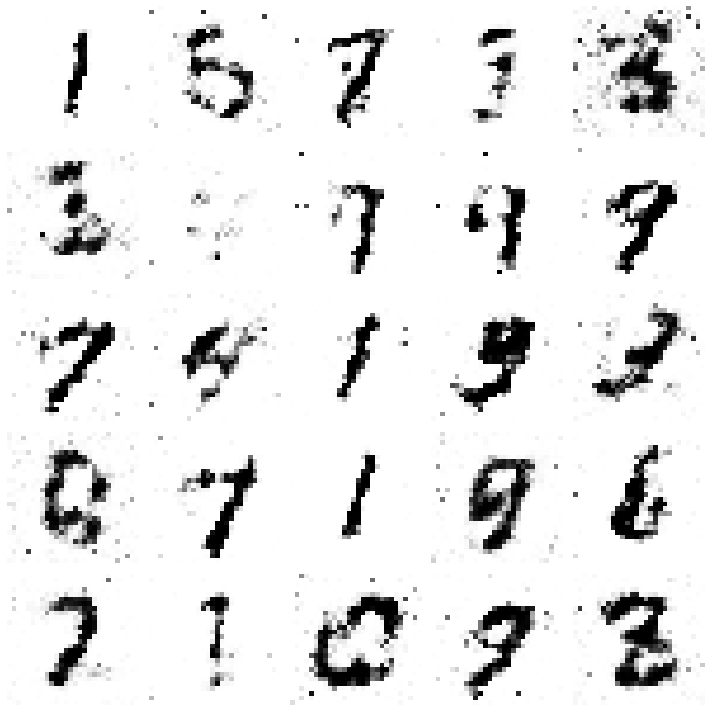

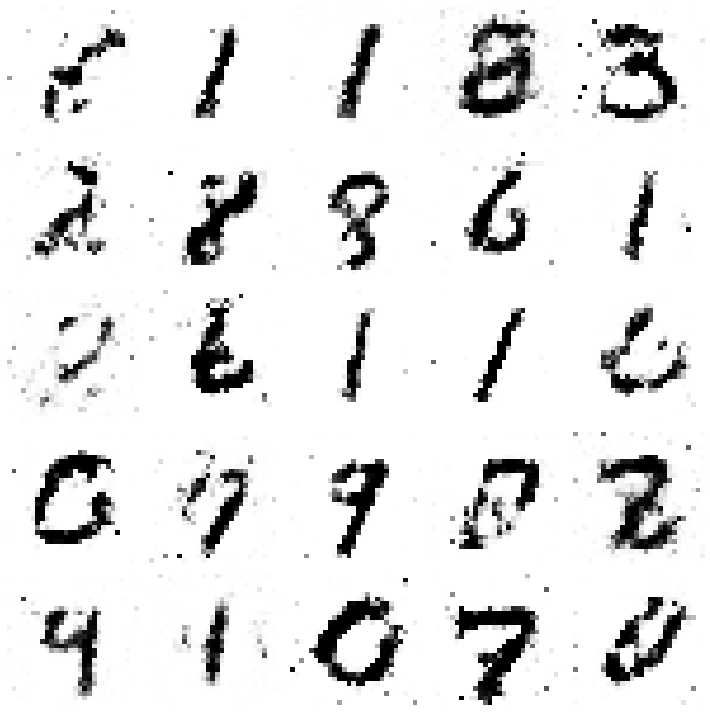

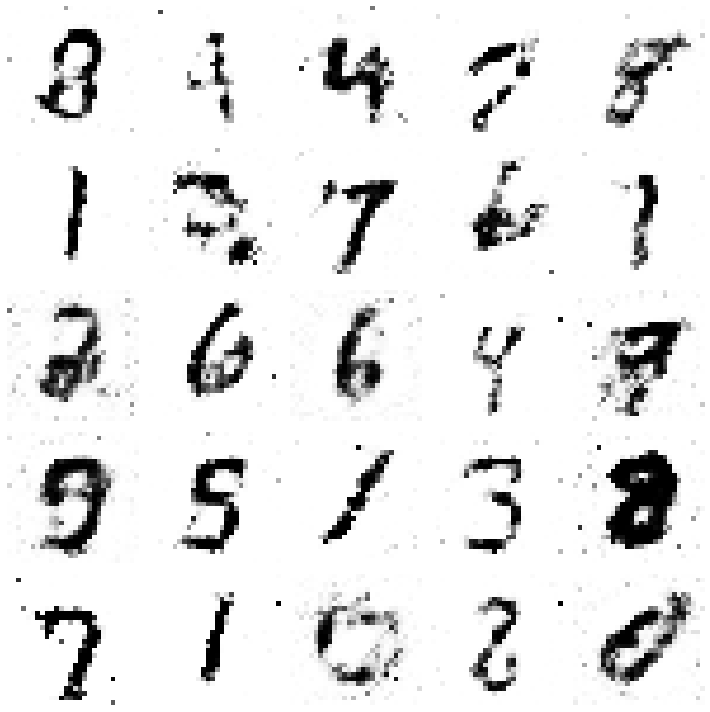

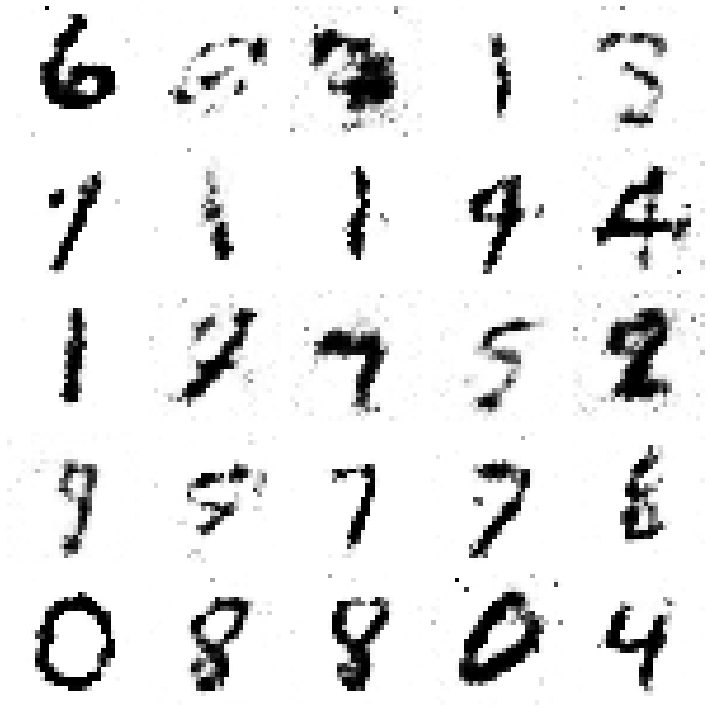

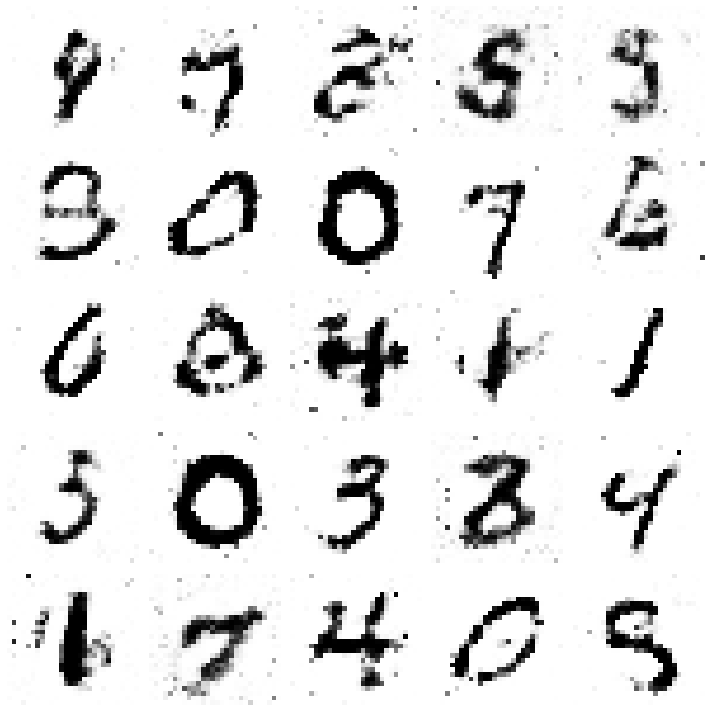

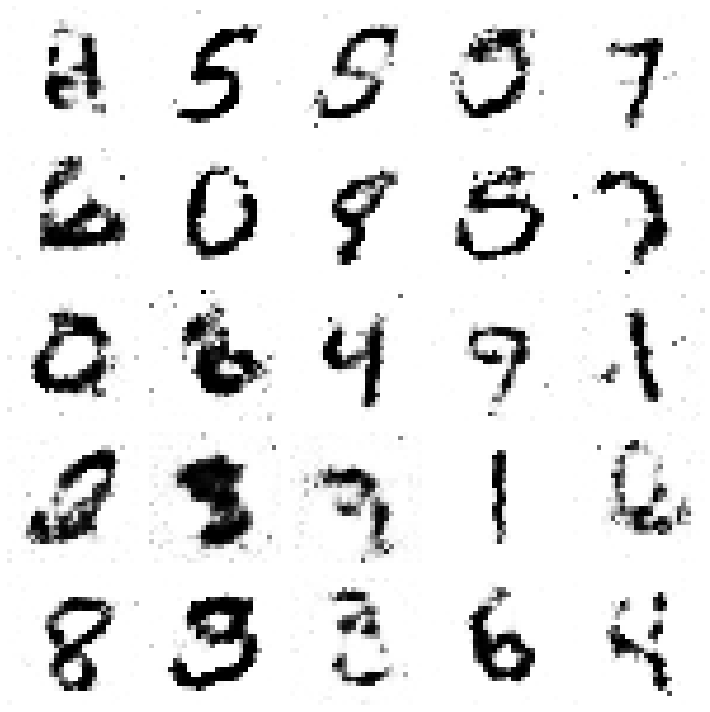

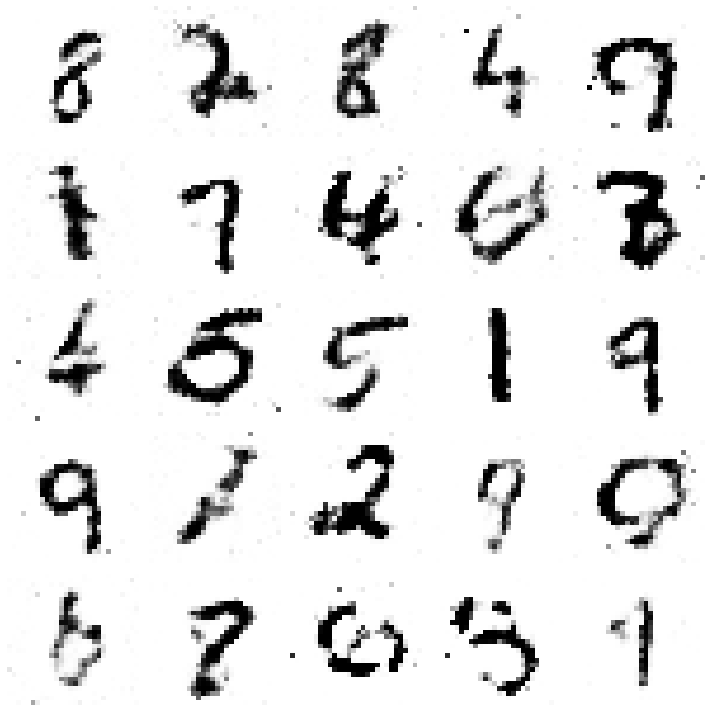

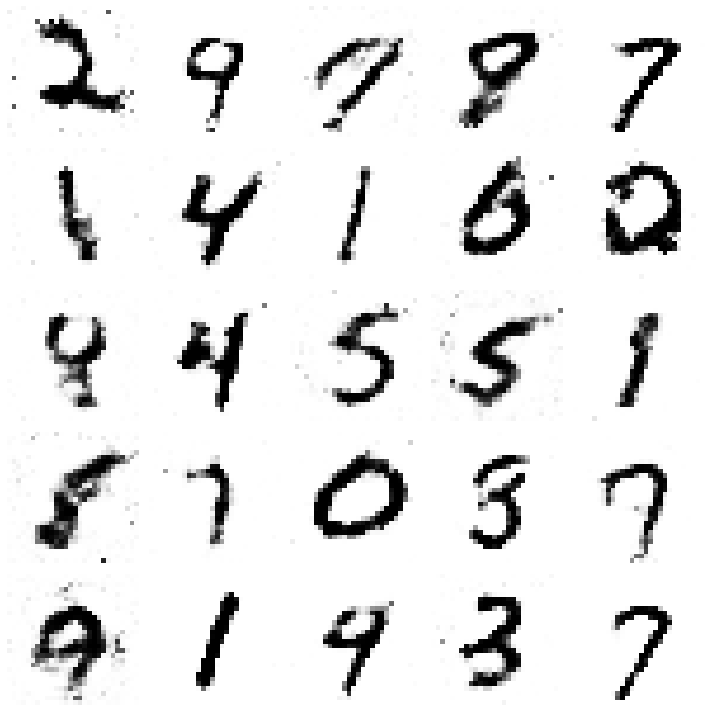

In [16]:
def train_GAN(epochs=1, batch_size=128):
    
  #Loading the data
  X_train, y_train = load_data()

  # Creating GAN
  generator= build_generator()
  discriminator= build_discriminator()
  GAN = build_GAN(discriminator, generator)

  for i in range(1, epochs+1):
    print("Epoch %d" %i)
    
    for _ in tqdm(range(batch_size)):
      # Generate fake images from random noiset
      noise= np.random.normal(0,1, (batch_size, 100))
      fake_images = generator.predict(noise)

      # Select a random batch of real images from MNIST
      real_images = X_train[np.random.randint(0, X_train.shape[0], batch_size)]

      # Labels for fake and real images           
      label_fake = np.zeros(batch_size)
      label_real = np.ones(batch_size) 

      # Concatenate fake and real images 
      X = np.concatenate([fake_images, real_images])
      y = np.concatenate([label_fake, label_real])

      # Train the discriminator
      discriminator.trainable=True
      discriminator.train_on_batch(X, y)

      # Train the generator/chained GAN model (with frozen weights in discriminator) 
      discriminator.trainable=False
      GAN.train_on_batch(noise, label_real)

    # Draw generated images every 15 epoches     
    if i == 1 or i % 10 == 0:
      draw_images(generator, i)
train_GAN(epochs=100, batch_size=128)